<a href="https://colab.research.google.com/github/peteryu24/petercoding-python/blob/main/c_c_p_fc_fc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/12
469/469 - 132s - loss: 0.2441 - accuracy: 0.9245 - val_loss: 0.0506 - val_accuracy: 0.9842 - 132s/epoch - 282ms/step
Epoch 2/12
469/469 - 130s - loss: 0.0863 - accuracy: 0.9744 - val_loss: 0.0456 - val_accuracy: 0.9840 - 130s/epoch - 277ms/step
Epoch 3/12
469/469 - 130s - loss: 0.0642 - accuracy: 0.9807 - val_loss: 0.0333 - val_accuracy: 0.9889 - 130s/epoch - 276ms/step
Epoch 4/12
469/469 - 130s - loss: 0.0507 - accuracy: 0.9840 - val_loss: 0.0332 - val_accuracy: 0.9896 - 130s/epoch - 277ms/step
Epoch 5/12
469/469 - 130s - loss: 0.0441 - accuracy: 0.9859 - val_loss: 0.0370 - val_accuracy: 0.9886 - 130s/epoch - 276ms/step
Epoch 6/12
469/469 - 129s - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0296 - val_accuracy: 0.9906 - 129s/epoch - 276ms/step
Epoch 7/12
469/469 - 129s - loss: 0.0344 - accuracy: 0.9895 - val_loss: 0.0283 - val_accuracy: 0.9912 - 129s/epoch - 274ms/step
Epoch 8/12
469/469 - 129s - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0345 - val_accuracy: 0.9905 - 

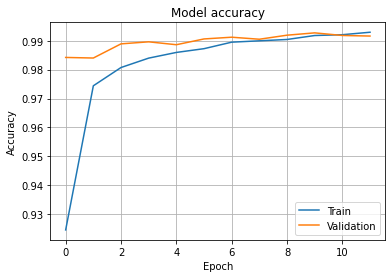

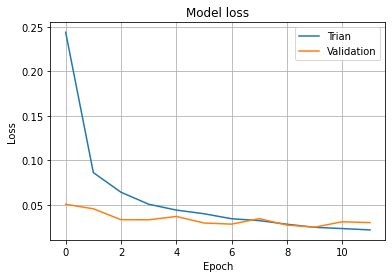

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

#after reading MNIST dataset convert to neural network type
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#C-C-P-FC-FC Convolutional neural network design
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

#learn neural network model
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

#evaluating neural network model accuracy
res=cnn.evaluate(x_test,y_test,verbose=0)
print("Accuracy: ",res[1]*100)

import matplotlib.pyplot as plt

#accuracy graph
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

#loss function graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Trian','Validation'],loc='best')
plt.grid()
plt.show()